# Esercizi Lezione 4 e 5

## 1. Consumo di alcol per paese

                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4
Media beer: 106.16062176165804
Media wine: 49.45077720207254
Media spirits: 80.99481865284974
Paese con max alcohol_index: Andorra
               country  beer_servings  spirit_servings  wine_servings  \
3              Andorra            245              138            312   
4               Angola            217               57             45   
5    Antigua & Barbuda            102              128  

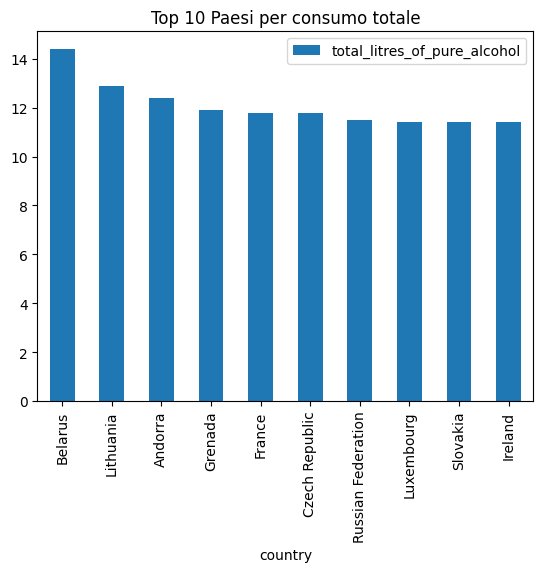

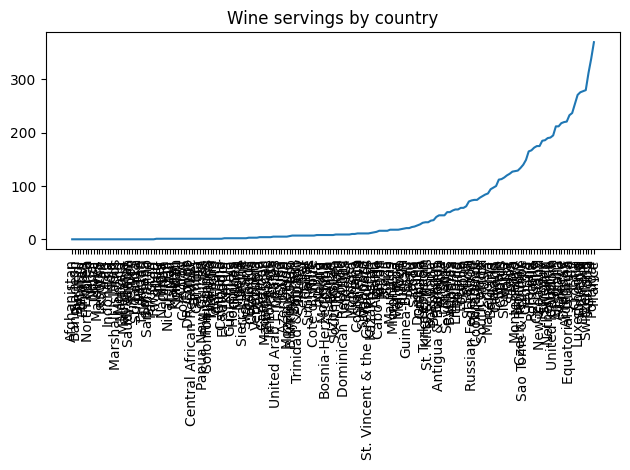

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dataset
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

# Primi 10 paesi per consumo totale
top10 = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
print(top10[['country', 'total_litres_of_pure_alcohol']])

# Media consumo birra, vino, distillati
print("Media beer:", df['beer_servings'].mean())
print("Media wine:", df['wine_servings'].mean())
print("Media spirits:", df['spirit_servings'].mean())

# Nuova colonna alcohol_index
df['alcohol_index'] = (df['beer_servings'] + df['wine_servings'] + df['spirit_servings']) / 3

# Paese con max alcohol_index
print("Paese con max alcohol_index:", df.loc[df['alcohol_index'].idxmax(), 'country'])

# Filtra paesi con più di 100 birre
over_100_beer = df[df['beer_servings'] > 100]
print(over_100_beer)

# Bar chart top10 per consumo totale
top10.plot(x='country', y='total_litres_of_pure_alcohol', kind='bar', title="Top 10 Paesi per consumo totale")
plt.show()

# Line plot ordinato per wine_servings
df_sorted = df.sort_values(by='wine_servings')
plt.plot(df_sorted['country'], df_sorted['wine_servings'])
plt.xticks(rotation=90)
plt.title('Wine servings by country')
plt.tight_layout()
plt.show()

## 2. Analisi offerte di lavoro

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukeabouse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Media annuale stipendio
media_stipendi = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

# Bar plot stipendi
media_stipendi.plot(kind='barh', title='Stipendio medio per ruolo', figsize=(10, 7))
plt.xlabel("Stipendio Medio")
plt.tight_layout()
plt.show()

# Offerte di lavoro per ruolo
offerte = df['job_title_short'].value_counts()
print(offerte)

# Range stipendi
minimi = df.groupby('job_title_short')['salary_year_avg'].min()
massimi = df.groupby('job_title_short')['salary_year_avg'].max()
print(pd.DataFrame({'Min': minimi, 'Max': massimi}))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetNotFoundError: Dataset 'lukeabouse/data_jobs' doesn't exist on the Hub or cannot be accessed.

## 3. Legge dei grandi numeri

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lanci_moneta(n):
    return np.random.choice(['T', 'C'], size=n)

sample_sizes = np.linspace(100, 20000, 100, dtype=int)
frequenze_testa = []

for size in sample_sizes:
    risultati = lanci_moneta(size)
    freq = np.mean(risultati == 'T') * 100
    frequenze_testa.append(freq)

plt.plot(sample_sizes, frequenze_testa)
plt.xlabel('Numero lanci')
plt.ylabel('% Testa')
plt.title('Legge dei grandi numeri')
plt.grid(True)
plt.show()